In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from connectivity import figures
from connectivity import visualize as vis

%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/Users/maedbhking/.local/share/virtualenvs/cerebellum_connectivity-DbxULmID/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)
/Users/maedbhking/Documents/SUITPy/SUITPy/__init__.py:27: FutureWarning: Fetchers from the SUITPy.atlas module will be updated in later versions as new atlases become available
  "updated in later versions as new atlases become available", FutureWarning)


In [25]:
# load train data

df_train = vis.get_summary(
            summary_type='train',
            exps=['sc1'],
            atlas=['tessels'],
            method=['WTA', 'ridge', 'lasso']
            )

In [2]:
# load eval data

df_eval =  vis.get_summary(
            summary_type='eval',
            exps=['sc2'],
            atlas=['tessels'],
            method=['WTA', 'ridge', 'lasso']
            )

In [9]:
# set plotting summary

vis.plotting_style()

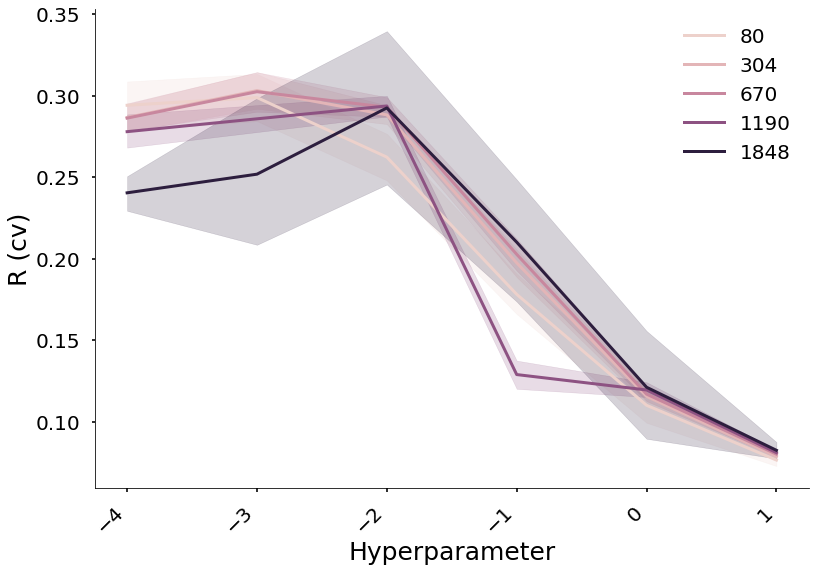

In [30]:
# train predictions (R CV: hyperparameter)

vis.plot_train_predictions(dataframe=df_train.query('train_hyperparameter>-5 and method=="lasso"'),
                          x='hyperparameter',
                          hue='num_regions'
                          ) 
plt.xlabel('Hyperparameter');

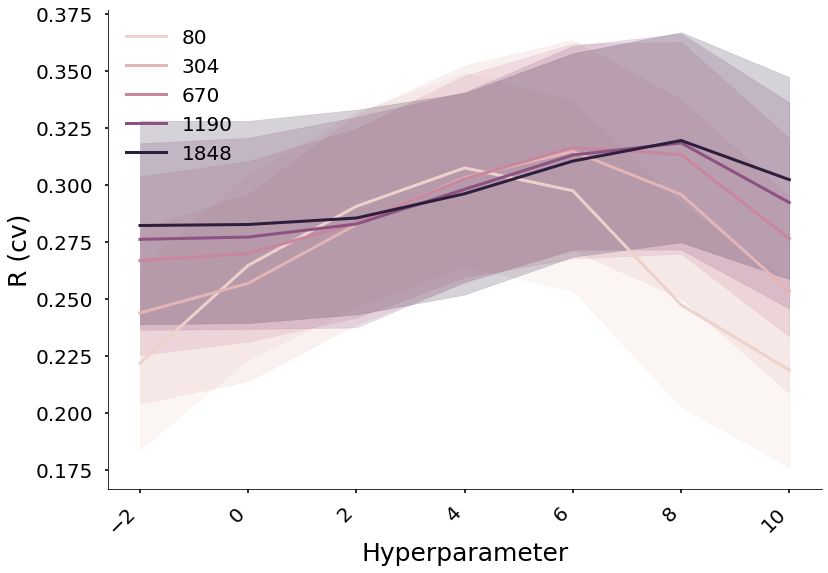

In [31]:
# train predictions (R CV: hyperparameter)

vis.plot_train_predictions(dataframe=df_train.query('method=="ridge"'),
                          x='hyperparameter',
                          hue='num_regions'
                          ) 
plt.xlabel('Hyperparameter');

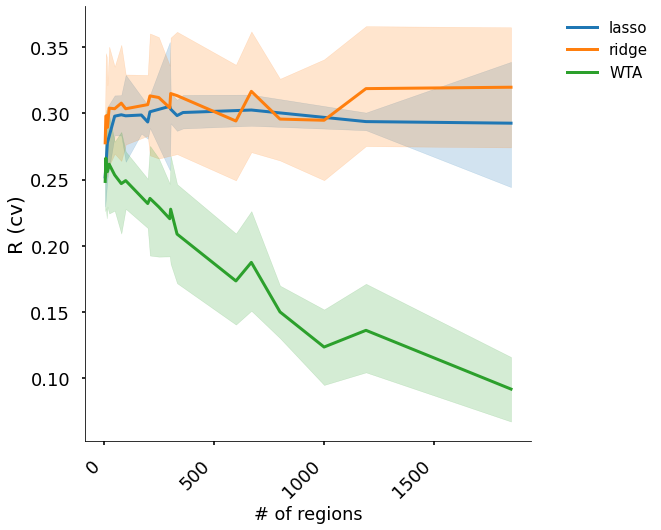

In [171]:
# train predictions (R CV: hyperparameter)

vis.plot_train_predictions(dataframe=df_train,
                          x='num_regions',
                          hue='model',
                          best_models=True) 
plt.xlabel('# of regions');

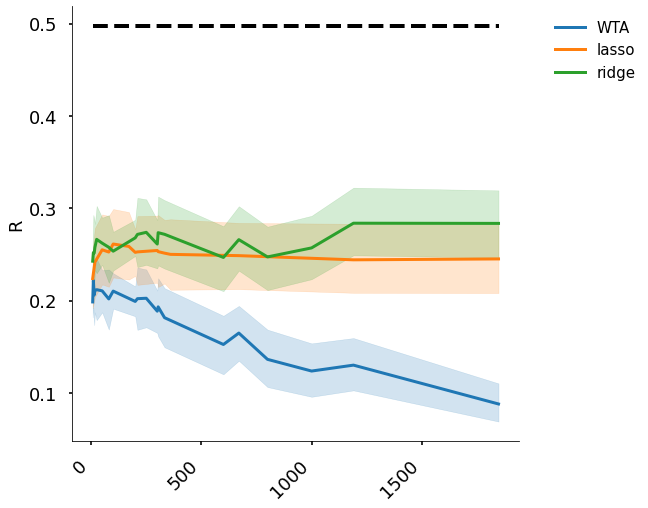

In [6]:
# EVAL predictions (R)

vis.plot_eval_predictions(dataframe=df_eval,
                        x='num_regions', 
                        hue='model', 
                        )
plt.xticks([0, 500, 1000, 1500]);

In [15]:
# plot eval map (R)

vis.map_eval_cerebellum(data="R", 
            exp="sc1", 
            model_name='best_model', 
            method='ridge',
            colorbar=True,
            title=False
            )

best model for sc1 is ridge_tessels1002_alpha_8


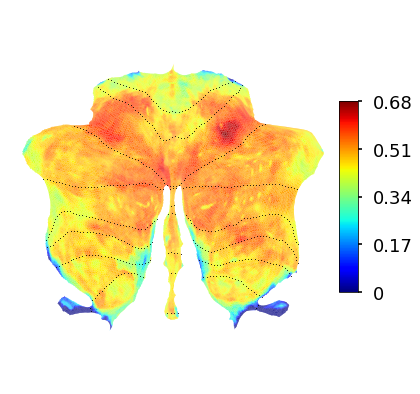

In [10]:
# plot noiseceiling (R)

vis.map_eval(data="noiseceiling_Y_R", 
            exp="sc1", 
            model_name='best_model', 
            method='ridge',
            colorbar=True,
            title=False
            )

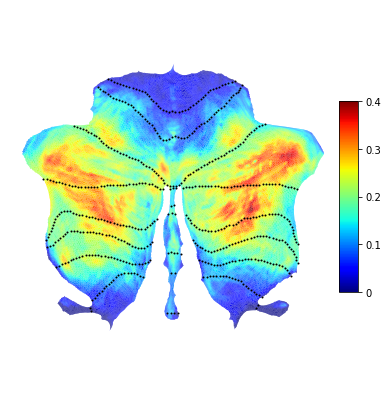

In [12]:
# plot lasso map

vis.map_lasso_cerebellum(model_name='lasso_tessels1002_alpha_-2', # lasso_tessels1002_alpha_-2
            exp="sc1", 
            stat='percent', # percent
            colorbar=True)

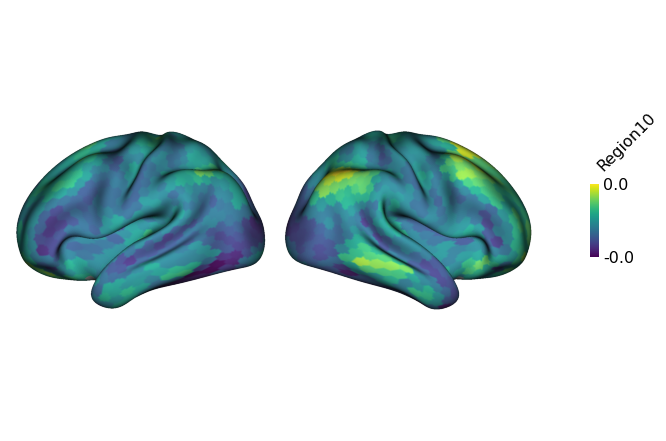

In [21]:
vis.map_distances_cortex(model_name='ridge_tessels1002_alpha_8',
                atlas='MDTB10',
                surf='inflated',
                threshold=100,
                column=9
                )

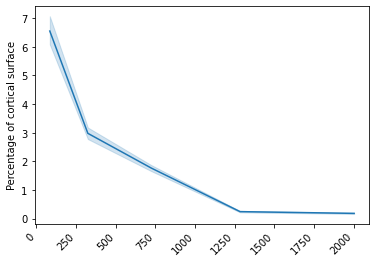

In [180]:
df = vis.plot_surfaces(y='percent', 
                      cortex='tessels',
                      weights='nonzero', 
                      method='lasso');